# 사전 학습 모델 성능 테스트

In [1]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/성윤/

Mounted at /gdrive
/gdrive/MyDrive/성윤


In [3]:
# =========================================================
# 1. 환경 설정
# =========================================================
!pip install transformers accelerate bitsandbytes pandas tqdm --quiet

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch, pandas as pd
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Device: {device}")

# =========================================================
# 2. 모델 로드 (Pretrained Baseline)
# =========================================================
model_id = "beomi/llama-2-ko-7b"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    dtype=torch.float16,
    device_map="auto",
    low_cpu_mem_usage=True
).eval()

print("✅ LLaMA-2-ko-7B 모델 로드 완료!")


# =========================================================
# 3. 데이터 로드
# =========================================================
csv_path = "./project_2/sample_question.csv"
df = pd.read_csv(csv_path)
print(f"📄 데이터 크기: {df.shape}")
print("열 이름:", df.columns.tolist())

df = df.rename(columns={
    "question": "prompt",
    "answer.contents": "response"
})

# =========================================================
# 4. Baseline 응답 생성
# =========================================================
def generate_answer(prompt, max_new_tokens=128):
    input_text = f"질문: {prompt}\n답변:"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True).split("답변:")[-1].strip()

results = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    q = row["prompt"]
    a_pred = generate_answer(q)
    results.append({
        "질문": q,
        "모델_응답": a_pred,
        "정답(데이터셋)": row.get("response", "")
    })

result_df = pd.DataFrame(results)


# =========================================================
# 5. 결과 출력
# =========================================================
from IPython.display import display
display(result_df.head(10))


for i, row in result_df.iterrows():
    print(f"Q{i+1}. {row['질문']}")
    print(f"🧠 모델 응답: {row['모델_응답']}")
    print(f"✅ 정답(데이터셋): {row['정답(데이터셋)']}")
    print("-" * 80)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 43.0 MB/s eta 0:00:00
✅ Device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model-00001-of-00015.safetensors:   0%|          | 0.00/919M [00:00<?, ?B/s]

model-00002-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00006-of-00015.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00005-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00007-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00008-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00004-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00003-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00009-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00010-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00011-of-00015.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00012-of-00015.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00013-of-00015.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00014-of-00015.safetensors:   0%|          | 0.00/742M [00:00<?, ?B/s]

model-00015-of-00015.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/15 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

✅ LLaMA-2-ko-7B 모델 로드 완료!
📄 데이터 크기: (50, 8)
열 이름: ['data_id', 'question_type', 'question_count', 'question', 'data_category.main', 'data_category.middle', 'answer.answer_count', 'answer.contents']


  0%|          | 0/50 [00:00<?, ?it/s]

,질문,모델_응답,정답(데이터셋)
0,토목공사는 어떤 종류가 있나요?,토목공사의 종류는 매우 많습니다. 그러나 크게 나누면 4가지로 나누어 볼 수 있습니...,토목공사는 다양한 종류가 있습니다. 일반적으로 다음과 같은 종류로 나눌 수 있습니다...
1,화학공학과 화학 공정 최적화에 어떤 수학적 기법이 사용되나요?,"1. 1995년 12월 20일 수요일, 19:22, 서울, KAIST 물리학과 3학...",화학공정 최적화에는 다양한 수학적 기법이 사용됩니다. 가장 흔하게 사용되는 몇 가지...
2,부동산 투자의 장점과 단점은 무엇인가?,부동산은 크게 보면 안전자산과 위험자산으로 나눌 수 있다.안전자산은 보통 은행예금과...,부동산 투자의 장점과 단점은 다음과 같습니다.\n\n장점:\n1. 안정성: 부동산은...
3,화학공학에서 재료의 재활용과 재활용 기술은 어떻게 연구되나요?,화학공학에서는 화학공정에서 발생하는 폐기물을 재활용하거나 재사용하는 연구가 활발히 ...,화학공학에서 재료의 재활용과 재활용 기술은 다양한 방법으로 연구됩니다. 주요 접근 ...
4,터널의 높이는 어떻게 결정되는 걸까?,터널의 높이는 지형에 따라 달라진다. 터널의 길이가 길어지면 길어질수록 높이가 낮아...,터널의 높이는 여러 가지 요인에 의해 결정됩니다. 일반적으로 다음과 같은 요인이 영...
5,식사를 할 때마다 속이 쓰려. 왜 이럴까?,위염.​​위염이 있는 경우에 식사 시 위산이 과다하게 분비되어 속이 쓰린 경우가 있...,식사 중에 속이 쓰려고 느끼는 이유는 여러 가지가 있을 수 있습니다. 몇 가지 가능...
6,"누가 자꾸 나를 킹 받게 하는데, 이럴 땐 그 사람한테 뭐라고 말해야 해?","​​""너가 지금 나한테 킹 당하는 거야.""​​​​​​​​​​​​​​​​​​​​​​​...","""그런 일을 하지 마세요. 나는 그런 것을 원하지 않습니다."""
7,비건 화장품이란 무엇인가요?,"비건 화장품은 일반 화장품과 달리, 동물성 성분이나 동물성 원료를 전혀 사용하지 않...","비건 화장품은 동물성 성분 및 부산물을 포함하지 않고, 동물 실험을 하지 않은 제품..."
8,한국에서 프로그래머의 평균 연봉은 어느 정도야?,"2007년 기준, 연봉 3,00만 원 이하가 25.2%, 3,00만 원~4,00만 ...","한국의 프로그래머의 평균 연봉은 2019년 기준으로 약 4,000만 원에서 5,00..."
9,여행을 통해 자연환경 보호에 기여하는 방법을 고민하는가?,여행을 통해 자연환경 보호에 기여하는 방법에 대한 질문이군요.​일단 여행을 통해 자...,"네, 저는 여행을 통해 자연환경 보호에 기여하는 방법에 대해 항상 고민합니다. 여행..."


Q1. 토목공사는 어떤 종류가 있나요?
🧠 모델 응답: 토목공사의 종류는 매우 많습니다. 그러나 크게 나누면 4가지로 나누어 볼 수 있습니다. 첫째, 도로공사가 있습니다. 도로공사는 도시와 도시를 연결하는 도로, 도시와 농촌을 연결하는 도로, 군부대와 군부대를 연결하는 도로, 항만과 항만을 연결하는 도로, 공항과 공항을 연결하는 도로, 철도, 지하철, 고속철도 등을 건설하는 공사입니다. 둘째, 수자원공사가 있습니다. 수자원공사는 댐건설, 하천공사, 상수도공사, 농업용수개발, 도시개발, 하천정비, 항만, 항
✅ 정답(데이터셋): 토목공사는 다양한 종류가 있습니다. 일반적으로 다음과 같은 종류로 나눌 수 있습니다.

1. 도로공사: 도로 설계, 토목 및 포장 작업, 교통 표지판 설치 등 도로 건설과 관련된 작업을 수행합니다.
2. 다목적 개발공사: 주택 단지, 상업 시설, 공원 등 지역의 다목적 개발을 위한 토목공사입니다.
3. 하천 공사: 하천의 보강, 환경 개선을 위한 공사로 강변 보호망, 하천 중산, 하천 간 돌출 방지를 포함합니다.
4. 해상 공사: 해양 시설물 설계 및 건설, 해양 구조물 유지 보수 등 해양 공간에 필요한 작업을 수행합니다.
5. 철도 공사: 철도 노선 설계, 선로 건설, 인프라 시설 구축 등 철도 건설과 관련된 작업을 수행합니다.
6. 다목적 보수공사: 도로 및 다리의 보수, 보강, 유지 보수 등을 수행합니다.
7. 지반 개량공사: 토지 설계 및 지반 보강, 지벽 보강 등의 작업을 포함합니다.
8. 터널 공사: 도로, 철도, 수로 등 지하공간에 터널 설계 및 건설 작업을 수행합니다.

이 외에도 다양한 토목공사 종류가 있지만, 위에 언급된 것들은 일반적으로 많이 진행되는 종류입니다.
--------------------------------------------------------------------------------
Q2. 화학공학과 화학 공정 최적화에 어떤 수학적 기법이 사용되나요?
🧠 모델 응답: 1. 1995년 12월 20

In [5]:
# =========================================================
# 6. 결과 저장
# =========================================================
# result_df DataFrame을 CSV 파일로 저장합니다.
# 파일 경로는 필요에 따라 수정해주세요.
output_csv_path = "./project_2/sample_result/LLaMA2_baseline_results.csv"
result_df.to_csv(output_csv_path, index=False)

print(f"\n✅ 결과가 '{output_csv_path}' 파일로 저장되었습니다.")


✅ 결과가 './project_2/sample_result/LLaMA2_baseline_results.csv' 파일로 저장되었습니다.


# 단일 성능 코드

📄 데이터 크기: (50, 3)
열: ['질문', '모델_응답', '정답(데이터셋)'] 

📊 기본 통계 요약:
       semantic_similarity     응답길이
count               50.000   50.000
mean                 0.647  220.560
std                  0.212   73.861
min                  0.006    5.000
25%                  0.550  198.500
50%                  0.713  232.000
75%                  0.791  263.500
max                  0.928  334.000

✨ 유사도 상위 3개 질문:

[8] 비건 화장품이란 무엇인가요?
유사도: 0.928
모델 응답: 비건 화장품은 일반 화장품과 달리, 동물성 성분이나 동물성 원료를 전혀 사용하지 않고 만들어집니다. 또한, 비건 화장품은 동물성 성분이나 동물성 원료를 사용하지 않음으로써 동물 실험을 하지 않고도, 동물성 원료를 사용하여 만들어진 제품들과 동일한 효과를 낼 수 있다는 점입니다. 비건 화장품의 종류는 매우 다양한데요, 비건 화장품에는
정답: 비건 화장품은 동물성 성분 및 부산물을 포함하지 않고, 동물 실험을 하지 않은 제품을 말합니다. 즉, 비건 화장품은 동물 복지와 환경 보호를 고려하여 제조되며, 동물성 성분 대신 식물성 성분 및 유기농 원료를 사용합니다. 또한, 동물 실험이 없으므로 동물에 대한 고통과 학대를 방지하는 측면에서도 유리한 제품입니다. 비건 화장품은 동물을 사랑하고 환경을 중시하는 소비자들에게 인기가 있으며, 인체에도 좋은 성분으로 구성되어 피부에도 자극을 줄일 수 있습니다.

[17] 심혈관 건강을 유지하기 위해서는 어떤 운동을 해야 합니까?
유사도: 0.909
모델 응답: 심혈관 건강을 유지하기 위한 운동은 심폐지구력 향상을 위한 유산소 운동을 규칙적으로 하는 것입

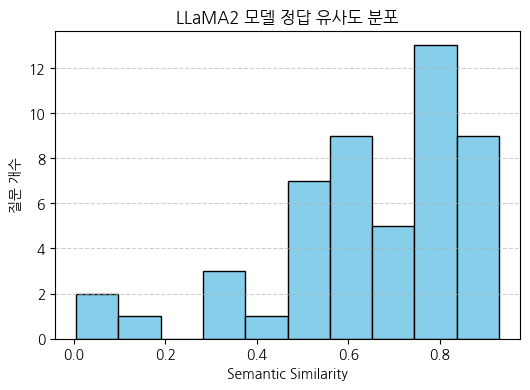

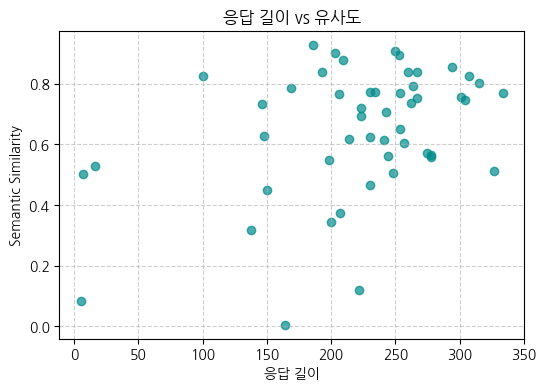

In [5]:
# =========================================================
# 1. 라이브러리 로드
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
!pip install -q koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib

# =========================================================
# 2. 파일 로드
# =========================================================
# 여기 선생님들 저장해놓으신 거 하시면 됩니다~
path = "./project_2/sample_result/LLaMA2_baseline_results.csv"
df = pd.read_csv(path)

print(f"📄 데이터 크기: {df.shape}")
print("열:", df.columns.tolist(), "\n")

# =========================================================
# 3. 의미 유사도 계산
# =========================================================
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

ref_emb = model.encode(df["정답(데이터셋)"], convert_to_tensor=True)
pred_emb = model.encode(df["모델_응답"], convert_to_tensor=True)

df["semantic_similarity"] = cosine_similarity(pred_emb.cpu(), ref_emb.cpu()).diagonal()

# =========================================================
# 4. 응답 길이 분석
# =========================================================
df["응답길이"] = df["모델_응답"].str.len()

print("📊 기본 통계 요약:")
print(df[["semantic_similarity", "응답길이"]].describe().round(3))

# =========================================================
# 5. 상위 / 하위 질문 확인
# =========================================================
top3 = df.nlargest(3, "semantic_similarity")[["질문", "모델_응답", "정답(데이터셋)", "semantic_similarity"]]
low3 = df.nsmallest(3, "semantic_similarity")[["질문", "모델_응답", "정답(데이터셋)", "semantic_similarity"]]

print("\n✨ 유사도 상위 3개 질문:")
for i, row in top3.iterrows():
    print(f"\n[{i+1}] {row['질문']}")
    print(f"유사도: {row['semantic_similarity']:.3f}")
    print("모델 응답:", row['모델_응답'])
    print("정답:", row['정답(데이터셋)'])

print("\n⚠️ 유사도 하위 3개 질문:")
for i, row in low3.iterrows():
    print(f"\n[{i+1}] {row['질문']}")
    print(f"유사도: {row['semantic_similarity']:.3f}")
    print("모델 응답:", row['모델_응답'])
    print("정답:", row['정답(데이터셋)'])

# =========================================================
# 6. 시각화
# =========================================================
plt.figure(figsize=(6,4))
plt.hist(df["semantic_similarity"], bins=10, color="skyblue", edgecolor="black")
plt.title("LLaMA2 모델 정답 유사도 분포")
plt.xlabel("Semantic Similarity")
plt.ylabel("질문 개수")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["응답길이"], df["semantic_similarity"], color="darkcyan", alpha=0.7)
plt.title("응답 길이 vs 유사도")
plt.xlabel("응답 길이")
plt.ylabel("Semantic Similarity")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 비교 코드

In [ ]:
# =========================================================
# 1. 라이브러리 로드
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# =========================================================
# 2. 파일 로드
# =========================================================
files = {
    "kanana": "/content/drive/MyDrive/project_2/sample_result/kanana_baseline_results.csv",
    "qwen": "/content/drive/MyDrive/project_2/sample_result/qwen_baseline_results.csv",
}

dfs = {}
for name, path in files.items():
    df = pd.read_csv(path)
    df["모델명"] = name
    dfs[name] = df

# 하나로 합치기
all_df = pd.concat(dfs.values(), ignore_index=True)
print(f"📄 총 데이터 크기: {all_df.shape}")

# =========================================================
# 3. 의미 유사도 계산 (정답 대비)
# =========================================================
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

ref_emb = model.encode(all_df["정답(데이터셋)"], convert_to_tensor=True)
pred_emb = model.encode(all_df["모델_응답"], convert_to_tensor=True)

all_df["semantic_similarity"] = cosine_similarity(
    pred_emb.cpu(), ref_emb.cpu()
).diagonal()

# =========================================================
# 4. 응답 길이 및 점수 통계
# =========================================================
all_df["응답길이"] = all_df["모델_응답"].str.len()

summary = all_df.groupby("모델명")[["semantic_similarity", "응답길이"]].mean()
summary["sample_n"] = all_df.groupby("모델명").size()
print("📊 모델별 평균 통계:")
print(summary.round(3))

# =========================================================
# 5. 시각화
# =========================================================
plt.figure(figsize=(6,4))
summary["semantic_similarity"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("모델별 정답 의미 유사도 평균")
plt.ylabel("평균 유사도 점수")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# =========================================================
# 6. 예시 문항 비교 테이블
# =========================================================
sample_idx = 2  # 3번째 질문 예시
sample_q = all_df.loc[sample_idx, "질문"]

print(f"\n[예시 질문] {sample_q}\n")
for name in files.keys():
    row = all_df[all_df["모델명"] == name].iloc[sample_idx]
    print(f"💬 {name} 응답:")
    print(row["모델_응답"], "\n")